In [23]:
# import dependencies
%matplotlib inline
import os
import csv
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from keras.models import Sequential
from keras.layers import Dense

# STEP 1 --- Data Loading / Transformation

In [34]:
# read data into dataframe  
path = 'ml_model_data/meters_for_ml.csv'
meters_inventory = pd.read_csv(path, sep=",")
meters_inventory

,meter_id,location,violation_description,fine_amount,counts,revenue,latitude,longitude,meter_type,policy_complexity,rate_type,park_limit
0,V77,101 VENICE WAY S,METER EXPIRED,63.0,465,29295.0,33.987418,-118.471119,Single-Space,11,FLAT,1.000000
1,V75,100 VENICE WAY,METER EXPIRED,63.0,450,28350.0,33.987243,-118.471043,Single-Space,11,FLAT,1.000000
2,NH940,4301 TUJUNGA AV,METER EXPIRED,63.0,447,28161.0,34.148960,-118.379082,Single-Space,13,FLAT,1.000000
3,NH935,4301 TUJUNGA AV,METER EXPIRED,63.0,446,28098.0,34.149560,-118.379083,Single-Space,13,FLAT,1.000000
4,V73,100 VENICE WAY,METER EXPIRED,63.0,430,27090.0,33.987264,-118.471196,Single-Space,11,FLAT,1.000000
5,NH934,4301 TUJUNGA AV,METER EXPIRED,63.0,427,26901.0,34.149693,-118.379082,Single-Space,13,FLAT,1.000000
6,V74,100 VENICE WAY,METER EXPIRED,63.0,420,26460.0,33.987256,-118.471134,Single-Space,11,FLAT,1.000000
7,V74,100 VENICE WAY,OUTSIDE LINES/METER,58.0,25,1450.0,33.987256,-118.471134,Single-Space,11,FLAT,1.000000
8,NH936,4301 TUJUNGA AV,METER EXPIRED,63.0,415,26145.0,34.149426,-118.379082,Single-Space,13,FLAT,1.000000
9,CB156,1300 HOPE ST S,METER EXPIRED,63.0,415,26145.0,34.037869,-118.266592,Single-Space,13,TOD,4.000000


> Since our dataset has latitude and longitude we are going to visualize the revenue and number of parking violations on the map.<br><br>
The radius of each circle represents revenue for each meter in the dataset (option s) and the color represents number of parking citations (option c). We will use a predifined color map, which ranges from blue (low values) to red (high number of parking tickets). The image tells us that number of tickets are very much related to revenue, as we probably knew already.

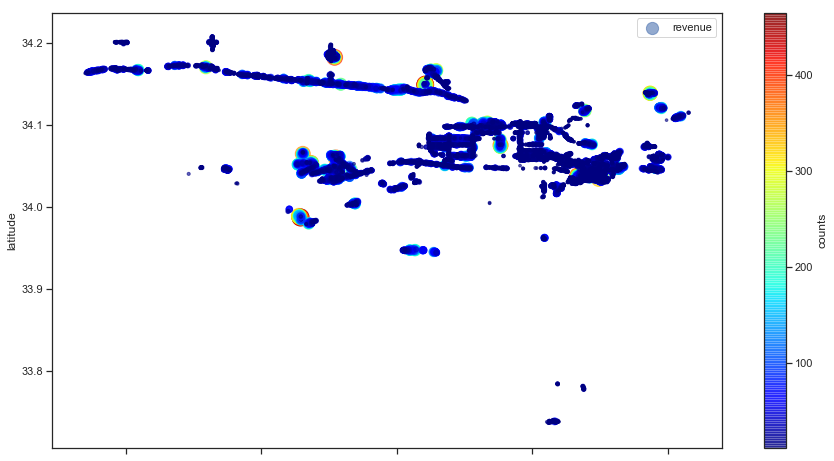

In [36]:
meters_inventory.plot(kind="scatter", x="longitude", y="latitude", alpha=0.6, figsize=(15,8),
         s=meters_inventory["revenue"]/100, label="revenue",
         c="counts", cmap=plt.get_cmap("jet"), colorbar=True,
     )
plt.legend()

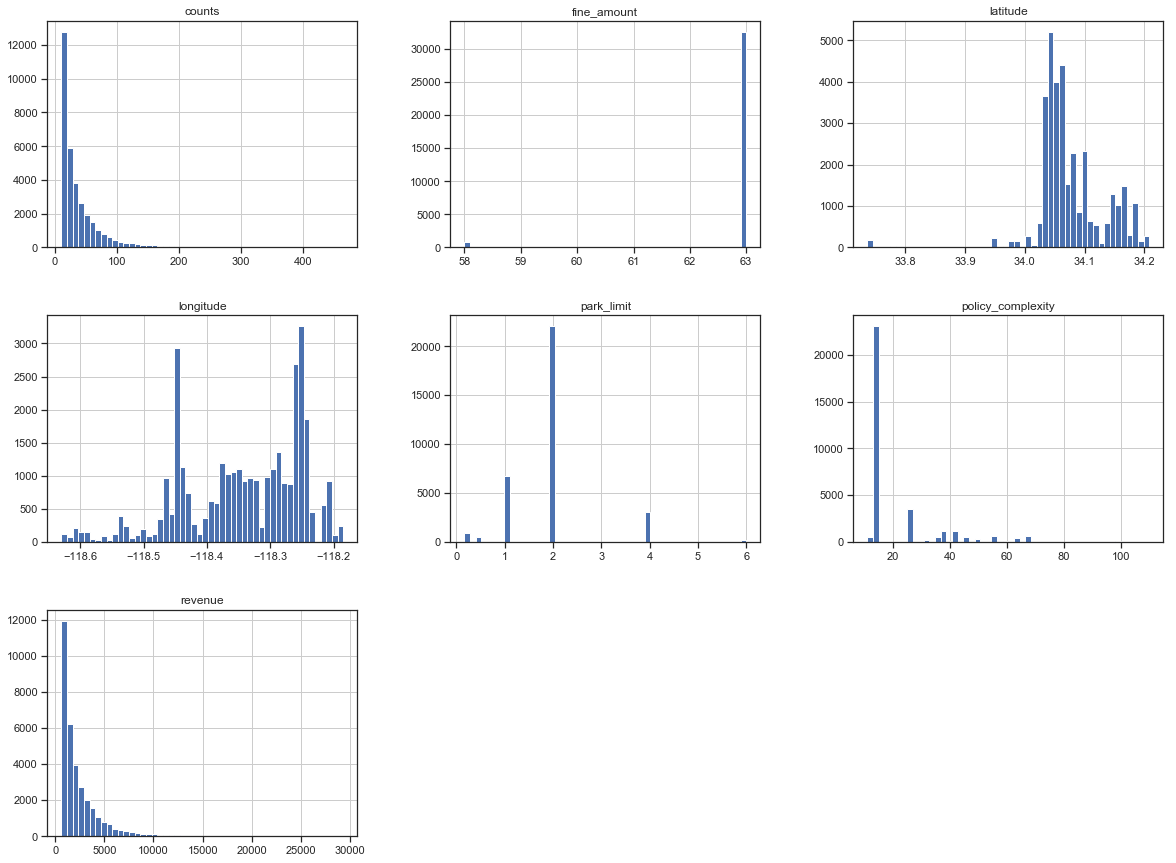

In [48]:
# plot a histogram for each numerical attribute
meters_inventory.hist(bins=50, figsize=(20,15)) 
plt.show()

In [35]:
#drop redundant columns
meters_inventory.drop(meters_inventory.columns[[0, 1, 4, 6, 7, 9, 11]], axis = 1, inplace = True)
meters_inventory.head()

,violation_description,fine_amount,revenue,meter_type,rate_type
0,METER EXPIRED,63.0,29295.0,Single-Space,FLAT
1,METER EXPIRED,63.0,28350.0,Single-Space,FLAT
2,METER EXPIRED,63.0,28161.0,Single-Space,FLAT
3,METER EXPIRED,63.0,28098.0,Single-Space,FLAT
4,METER EXPIRED,63.0,27090.0,Single-Space,FLAT


### One Hot Encoding

Conversion items:
- violation_description
- fine_amount
- meter_type
- rate_type

In [36]:
# "violation_description" conversion
violations = meters_inventory.pop('violation_description')
meters_inventory['meter_expired'] = (violations == "METER EXPIRED")*1.0
meters_inventory['outside_lines'] = (violations == "OUTSIDE LINES/METER")*1.0
meters_inventory['off_str'] = (violations == "OFF STR/OVERTIME/MTR")*1.0

In [37]:
# "fine_amount" conversion
fines = meters_inventory.pop('fine_amount')
meters_inventory['fine_$63'] = (fines == 63)*1.0
meters_inventory['fine_$58'] = (fines == 58)*1.0

In [38]:
# "meter_type" conversion
meters_type = meters_inventory.pop('meter_type')
meters_inventory['single_type'] = (meters_type == "Single-Space")*1.0

In [39]:
# "rate_type" conversion
rates = meters_inventory.pop('rate_type')
meters_inventory['flat'] = (rates == "FLAT")*1.0
meters_inventory['tod'] = (rates == "TOD")*1.0
meters_inventory['jump'] = (rates == "JUMP")*1.0

### Verify Data Types, Updates and Save CSV file

In [44]:
# dataset randomazation to avoid dataframe ordering
meters_inventory["random"] = np.random.randint(40000, size=33421)
meters_inventory.sort_values("random")

,revenue,meter_expired,outside_lines,off_str,fine_$63,fine_$58,single_type,flat,tod,jump,random
12618,2961.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1
32925,693.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1
18606,2016.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1
6816,4536.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1
13659,1197.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2
27857,1071.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4
6722,1386.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4
24450,1386.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5
12880,945.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,6
13786,2772.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6


In [45]:
meters_inventory.drop(["random"], axis = 1, inplace = True)
meters_inventory.head(20)

,revenue,meter_expired,outside_lines,off_str,fine_$63,fine_$58,single_type,flat,tod,jump
0,29295.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,28350.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,28161.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,28098.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,27090.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
5,26901.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6,26460.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7,1450.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
8,26145.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
9,26145.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [46]:
meters_inventory.dtypes

revenue          float64
meter_expired    float64
outside_lines    float64
off_str          float64
fine_$63         float64
fine_$58         float64
single_type      float64
flat             float64
tod              float64
jump             float64
dtype: object

In [47]:
meters_inventory.shape

(33421, 10)

In [48]:
meters_inventory.to_csv("ml_model_data/meters_for_ml_final.csv", encoding = 'utf-8', index = False)

# STEP 2 --- ML Models

### Fit Data 

In [49]:
X = meters_inventory.drop("revenue", axis=1)
y = meters_inventory["revenue"]
print(X.shape, y.shape)

(33421, 9) (33421,)


## MODEL 1 --- Linear Regression

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [52]:
model1.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
y_predicted = model1.predict(X_test)
y_predicted = np.round_(y_predicted,0)

In [53]:
# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R squared (R2 ): {r2}")

Mean Squared Error (MSE): 5407112.031413613
R squared (R2 ): 0.014325891082676678


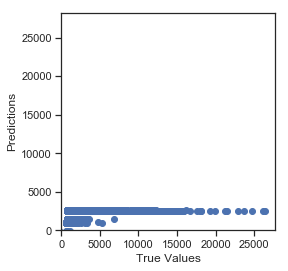

In [54]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## MODEL 2 --- Decision Tree

In [55]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()

In [56]:
model2.fit(X_train, y_train)

# Use our model to predict a value
y_predicted = model2.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 8638010.423784593
R-squared (R2 ): -0.5746415420685291


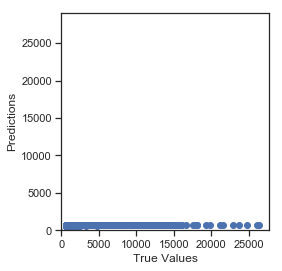

In [57]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## MODEL 3 --- Random Forest (n_estimators=100)

In [58]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier(n_estimators=100)

In [59]:
model3.fit(X_train, y_train)


# Use our model to predict a value
y_predicted = model3.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 8638010.423784593
R-squared (R2 ): -0.5746415420685291


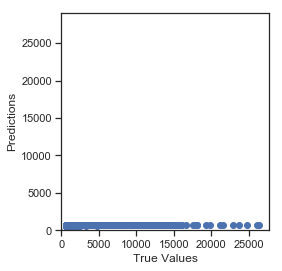

In [60]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## MODEL 4 --- Deep Learning

In [63]:
# define and fit the final model
model4 = Sequential()

In [64]:
model4.add(Dense(9, input_dim=9, activation='relu'))
model4.add(Dense(9, activation='relu'))
model4.add(Dense(1, activation='linear'))

In [65]:
model4.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model4.fit(X_train, y_train, epochs=450, verbose=0)

In [66]:
model4.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model4.fit(X_train, y_train, epochs=5, verbose=0)

In [67]:
# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
y_predicted = model4.predict(X_test)
y_predicted = np.round_(y_predicted,0)

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

loss, mae, mse = model4.evaluate(X_test, y_test, verbose=0)

print(f"Mean Absulte Error: {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R squared (R2 ): {r2}")

Mean Absulte Error: 1527.8268880269202
Mean Squared Error (MSE): 5408063.653216155
R squared (R2 ): 0.014146575974557485


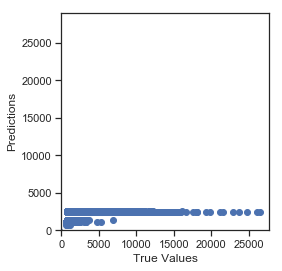

In [68]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])